<a href="https://colab.research.google.com/github/baddfish/Correlates_of_War_Project/blob/master/Correlate_of_War.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Correlates of War**

**National Material Capabilities**

![alt text](https://asc.army.mil/web/wp-content/uploads/2018/04/Modernization-overview_3623722-mod.jpg)


The newest release of information from the Correlates of War Project (COW) was released on January 6th, 2020. The COW Project was founded in 1963 with the continual goal to acquire "systematic accumulation of scientific knowledge about war". 

As stated by the COW Project, "Power is considered by many to be a central concept in explaining conflict, and six indicators - military expenditure, military personnel, energy consumption, iron and steel production, urban population, and total population - are included in this data set. It serves as the basis for the most widely used indicator of national capability, CINC (Composite Indicator of National Capability) and covers the period 1816–2012."

Why were these six variables chosen? According to the project, these variables were chosen based on an immense amount of research and work by historians, social and physical scientists, military analysts, and operations researchers that examined the ideas of power base, national strength, and material capabilities.

**Import needed libraries**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

**Load dataset**

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/baddfish/Correlates_of_War_Project/master/NMC_5_0.csv')
df

,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version
0,USA,2,1816,3823,17,80,254,8659.0,101.0,0.039698,2011
1,USA,2,1817,2466,15,80,277,8899.0,106.0,0.035817,2011
2,USA,2,1818,1910,14,90,302,9139.0,112.0,0.036126,2011
3,USA,2,1819,2301,13,90,293,9379.0,118.0,0.037133,2011
4,USA,2,1820,1556,15,110,303,9618.0,124.0,0.037087,2011
...,...,...,...,...,...,...,...,...,...,...,...
15166,WSM,990,2008,0,0,0,39,183.0,0.0,0.000005,2011
15167,WSM,990,2009,0,0,0,38,185.0,0.0,0.000005,2011
15168,WSM,990,2010,0,0,0,38,186.0,0.0,0.000005,2011
15169,WSM,990,2011,0,0,0,38,187.0,0.0,0.000005,2011


**Dataset Variable Description**

1 “**stateabb**” *3 letter country Abbreviation*

2 “**ccode**” *COW Country code*

3 “**year**” *Year of observation*

4 “**irst**” *Iron and steel production (thousands of tons)*

5 “**milex**” *Military Expenditures (For 1816-1913: thousands of current year British Pounds. For 1914+: thousands of current year US Dollars.)*

6 “**milper**” *Military Personnel (thousands)*

7 “**pec**” *Primary Energy consumption (thousands of coal-ton equivalents)*

8 “**tpop**” *Total Population (thousands)*

9 “**upop**” *Urban population (population living in cities with
population greater than 100,000; in thousands)*

10 “**cinc**” *Composite Index of National Capability (CINC) score*

11 “**version**” *Version number of the data set*

**Exploratory Data Analysis**

In [5]:
## Check shape

df.shape

(15171, 11)

In [6]:
## Check df head
df.head

<bound method NDFrame.head of       stateabb  ccode  year  milex  ...    tpop   upop      cinc  version
0          USA      2  1816   3823  ...  8659.0  101.0  0.039698     2011
1          USA      2  1817   2466  ...  8899.0  106.0  0.035817     2011
2          USA      2  1818   1910  ...  9139.0  112.0  0.036126     2011
3          USA      2  1819   2301  ...  9379.0  118.0  0.037133     2011
4          USA      2  1820   1556  ...  9618.0  124.0  0.037087     2011
...        ...    ...   ...    ...  ...     ...    ...       ...      ...
15166      WSM    990  2008      0  ...   183.0    0.0  0.000005     2011
15167      WSM    990  2009      0  ...   185.0    0.0  0.000005     2011
15168      WSM    990  2010      0  ...   186.0    0.0  0.000005     2011
15169      WSM    990  2011      0  ...   187.0    0.0  0.000005     2011
15170      WSM    990  2012      0  ...   189.0    0.0  0.000005     2011

[15171 rows x 11 columns]>

In [7]:
## Check df data types

df.dtypes

stateabb     object
ccode         int64
year          int64
milex         int64
milper        int64
irst          int64
pec           int64
tpop        float64
upop        float64
cinc        float64
version       int64
dtype: object

In [8]:
## check df na

df.isnull().sum()

stateabb    0
ccode       0
year        0
milex       0
milper      0
irst        0
pec         0
tpop        0
upop        0
cinc        0
version     0
dtype: int64

Our dataset looks clean and ready to explore

I'll make a few basic plots to learn more..

First, we'll look at 'milex' (Miitary Expenditure), and 'milper' (Miltary Personnel) over the dataset years 1816-2012

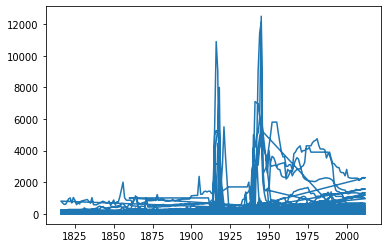

In [10]:
plt.plot(df['year'], df['milper']);

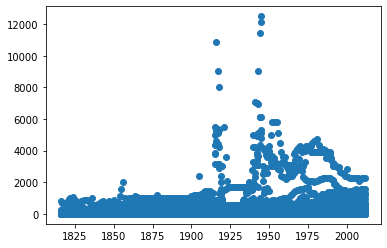

In [11]:
plt.scatter(df['year'], df['milper']);

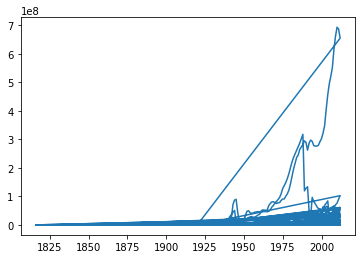

In [12]:
plt.plot(df['year'], df['milex']);

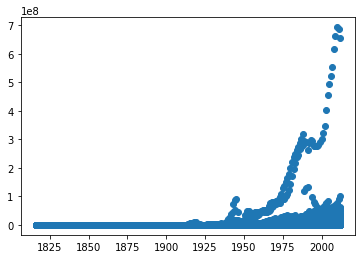

In [13]:
plt.scatter(df['year'], df['milex']);

Now, let's take a closer look at countries by the CINC (Composite Index of National Capability (CINC) score

Text(0, 0.5, 'Composite Index of National Capability (CINC) score')

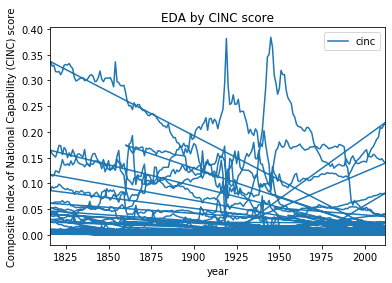

In [41]:
df.plot('year', 'cinc');
plt.title("EDA by CINC score")
plt.xlabel('year')
plt.ylabel('Composite Index of National Capability (CINC) score')


After some thought, we've decided to take a look at the current (as of 2012) top ten countries by CINC composite. Let's find them below..

In [15]:
df['stateabb'].value_counts()

RUS    197
POR    197
UKG    197
ITA    197
SWZ    197
      ... 
PMA     10
MNG      7
KOS      5
ZAN      2
SSD      2
Name: stateabb, Length: 217, dtype: int64

In [16]:
## get top 10 cinc from 2012
df_2012 = df[df['year'] == 2012] 
top_cinc_df = df_2012.nlargest(10, ['cinc'])
top_cinc_df.head(10)


,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version
13141,CHN,710,2012,102643000,2285,731040,5333707,1377065.0,440254.0,0.218117,2011
196,USA,2,2012,655388000,1569,88695,3159873,317505.0,183712.0,0.139353,2011
13658,IND,750,2012,33404000,1325,77264,1385461,1236687.0,223768.0,0.080899,2011
7863,RUS,365,2012,58765000,956,70209,1356742,143170.0,53585.0,0.040079,2011
13592,JPN,740,2012,59077000,248,107232,737482,127250.0,86437.0,0.035588,2011
2929,BRA,140,2012,35266000,318,34524,345842,198656.0,94199.0,0.025063,2011
13445,ROK,732,2012,29256000,655,69073,444461,49003.0,32959.0,0.023212,2011
5572,GMY,255,2012,40994000,251,42661,468740,82800.0,15605.0,0.017910,2011
11720,IRN,630,2012,25249000,523,14463,397332,76424.0,28265.0,0.015762,2011
3930,UKG,200,2012,61274000,174,9579,315502,62783.0,28933.0,0.015277,2011


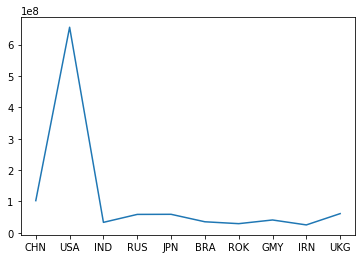

In [17]:
plt.plot(top_cinc_df['stateabb'], top_cinc_df['milex']);

Now that we have identified our current 
top 10, we can create df for each

In [18]:
df_usa = df[df['stateabb'] == 'USA']
df_china = df[df['stateabb'] == 'CHN']
df_india = df[df['stateabb'] == 'IND']
df_russia = df[df['stateabb'] == 'RUS']
df_japan = df[df['stateabb'] == 'JPN']
df_brazil = df[df['stateabb'] == 'BRA']
df_skorea = df[df['stateabb'] == 'ROK']
df_germany = df[df['stateabb'] == 'GMY']
df_iran = df[df['stateabb'] == 'IRN']
df_uk = df[df['stateabb'] == 'UKG']

df_usa

,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version
0,USA,2,1816,3823,17,80,254,8659.0,101.0,0.039698,2011
1,USA,2,1817,2466,15,80,277,8899.0,106.0,0.035817,2011
2,USA,2,1818,1910,14,90,302,9139.0,112.0,0.036126,2011
3,USA,2,1819,2301,13,90,293,9379.0,118.0,0.037133,2011
4,USA,2,1820,1556,15,110,303,9618.0,124.0,0.037087,2011
...,...,...,...,...,...,...,...,...,...,...,...
192,USA,2,2008,616073000,1498,91350,3258569,306657.0,172381.0,0.147870,2011
193,USA,2,2009,662049000,1540,58196,3108946,309492.0,175133.0,0.145986,2011
194,USA,2,2010,693600000,1580,80495,3211935,312247.0,177349.0,0.148098,2011
195,USA,2,2011,687000000,1564,86398,3206262,314912.0,180792.0,0.143291,2011


In [19]:
df_china

,stateabb,ccode,year,milex,milper,irst,pec,tpop,upop,cinc,version
12989,CHN,710,1860,-9,1000,10,0,379382.0,-9.0,0.174288,2011
12990,CHN,710,1861,-9,1000,10,0,374670.0,-9.0,0.172672,2011
12991,CHN,710,1862,-9,1000,10,0,370015.0,-9.0,0.170761,2011
12992,CHN,710,1863,-9,1000,10,0,365419.0,-9.0,0.164349,2011
12993,CHN,710,1864,-9,1000,10,0,360880.0,-9.0,0.159389,2011
...,...,...,...,...,...,...,...,...,...,...,...
13137,CHN,710,2008,60187000,2105,512339,3857902,1342733.0,376397.0,0.189376,2011
13138,CHN,710,2009,70381000,2185,577070,4197495,1351248.0,391335.0,0.208190,2011
13139,CHN,710,2010,76361000,2285,638743,4529730,1359821.0,407821.0,0.206988,2011
13140,CHN,710,2011,90221000,2285,683883,5043897,1368440.0,423604.0,0.212244,2011


Some EDA with pandas here. We will drop all columns but 'cinc'

     stateabb  year      cinc
0         USA  1816  0.039698
1         USA  1817  0.035817
2         USA  1818  0.036126
3         USA  1819  0.037133
4         USA  1820  0.037087
...       ...   ...       ...
3926      UKG  2008  0.017451
3927      UKG  2009  0.016216
3928      UKG  2010  0.015634
3929      UKG  2011  0.015246
3930      UKG  2012  0.015277

[1534 rows x 3 columns]


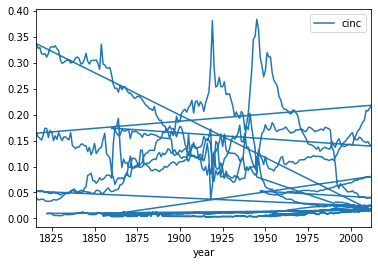

In [42]:
cinc_combined = pd.concat([df_usa, df_china, df_russia, df_india, df_iran, 
                           df_brazil, df_skorea, df_germany, df_iran,
                           df_uk]).drop(columns=['ccode', 'milex',
                                                 'milper', 'irst', 
                                                 'upop','version', 
                                                 'tpop', 'pec'])
print(cinc_combined)

cinc_combined.plot(x='year', y='cinc');

We've decided to plot our findings with matplotlib:

**CINC Score plot**

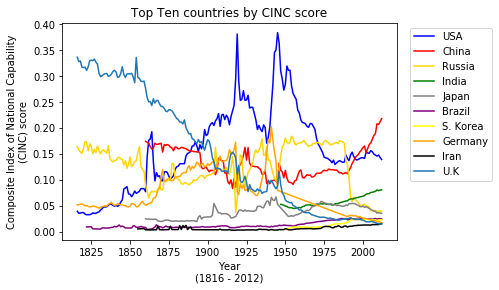

In [33]:
plt.plot(df_usa['year'], df_usa['cinc'], color='blue')
plt.plot(df_china['year'], df_china['cinc'], color='red')
plt.plot(df_russia['year'], df_russia['cinc'], color='gold')
plt.plot(df_india['year'], df_india['cinc'], color='green')
plt.plot(df_japan['year'], df_japan['cinc'], color='grey')
plt.plot(df_brazil['year'], df_brazil['cinc'], color='purple')
plt.plot(df_skorea['year'], df_skorea['cinc'], color='yellow')
plt.plot(df_germany['year'], df_germany['cinc'], color='orange')
plt.plot(df_iran['year'], df_iran['cinc'], color='black')
plt.plot(df_uk['year'], df_uk['cinc']); color='dark blue'
plt.title("Top Ten countries by CINC score")
plt.xlabel('Year\n(1816 - 2012)')
plt.ylabel('Composite Index of National Capability\n(CINC) score')
plt.legend(['USA', 'China', 'Russia', 'India', 'Japan', 'Brazil', 'S. Korea', 'Germany', 'Iran', 'U.K'], bbox_to_anchor=(1.3, 1), loc='upper right', ncol=1);


**Military Expenditure plot**

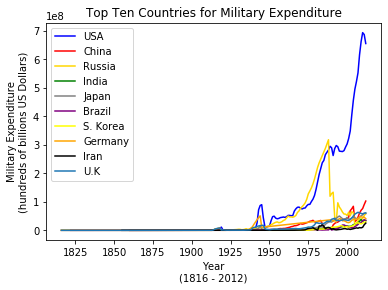

In [24]:
plt.plot(df_usa['year'], df_usa['milex'], color='blue')
plt.plot(df_china['year'], df_china['milex'], color='red')
plt.plot(df_russia['year'], df_russia['milex'], color='gold')
plt.plot(df_india['year'], df_india['milex'], color='green')
plt.plot(df_japan['year'], df_japan['milex'], color='grey')
plt.plot(df_brazil['year'], df_brazil['milex'], color='purple')
plt.plot(df_skorea['year'], df_skorea['milex'], color='yellow')
plt.plot(df_germany['year'], df_germany['milex'], color='orange')
plt.plot(df_iran['year'], df_iran['milex'], color='black')
plt.plot(df_uk['year'], df_uk['milex']); color='dark blue'
plt.title("Top Ten Countries for Military Expenditure")
plt.xlabel('Year\n(1816 - 2012)')
plt.ylabel('Military Expenditure\n(hundreds of billions US Dollars)')
plt.legend(['USA', 'China', 'Russia', 'India', 'Japan', 'Brazil', 'S. Korea', 'Germany', 'Iran', 'U.K']);

**Military Personnel plot**

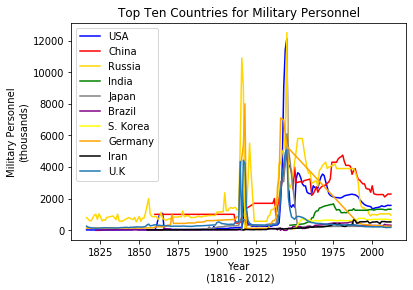

In [25]:
plt.plot(df_usa['year'], df_usa['milper'], color='blue')
plt.plot(df_china['year'], df_china['milper'], color='red')
plt.plot(df_russia['year'], df_russia['milper'], color='gold')
plt.plot(df_india['year'], df_india['milper'], color='green')
plt.plot(df_japan['year'], df_japan['milper'], color='grey')
plt.plot(df_brazil['year'], df_brazil['milper'], color='purple')
plt.plot(df_skorea['year'], df_skorea['milper'], color='yellow')
plt.plot(df_germany['year'], df_germany['milper'], color='orange')
plt.plot(df_iran['year'], df_iran['milper'], color='black')
plt.plot(df_uk['year'], df_uk['milper']); color='dark blue'
plt.title("Top Ten Countries for Military Personnel")
plt.xlabel('Year\n (1816 - 2012)')
plt.ylabel('Military Personnel\n(thousands)')
plt.legend(['USA', 'China', 'Russia', 'India', 'Japan', 'Brazil', 'S. Korea', 'Germany', 'Iran', 'U.K']);


**Energy Consumption plot**

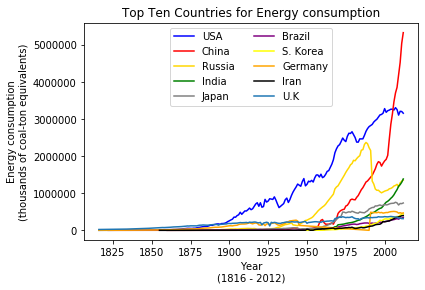

In [26]:
plt.plot(df_usa['year'], df_usa['pec'], color='blue')
plt.plot(df_china['year'], df_china['pec'], color='red')
plt.plot(df_russia['year'], df_russia['pec'], color='gold')
plt.plot(df_india['year'], df_india['pec'], color='green')
plt.plot(df_japan['year'], df_japan['pec'], color='grey')
plt.plot(df_brazil['year'], df_brazil['pec'], color='purple')
plt.plot(df_skorea['year'], df_skorea['pec'], color='yellow')
plt.plot(df_germany['year'], df_germany['pec'], color='orange')
plt.plot(df_iran['year'], df_iran['pec'], color='black')
plt.plot(df_uk['year'], df_uk['pec']); color='dark blue'
plt.title("Top Ten Countries for Energy consumption")
plt.xlabel('Year\n(1816 - 2012)')
plt.ylabel('Energy consumption\n(thousands of coal-ton equivalents)')
plt.legend(['USA', 'China', 'Russia', 'India', 'Japan', 'Brazil', 'S. Korea', 'Germany', 'Iran', 'U.K'], bbox_to_anchor=(.5, 1), loc='upper center', ncol=2);

**Iron and Steel plot**

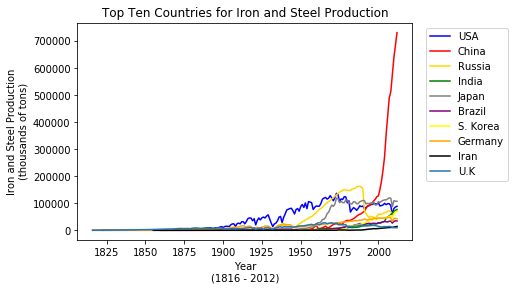

In [27]:
plt.plot(df_usa['year'], df_usa['irst'], color='blue')
plt.plot(df_china['year'], df_china['irst'], color='red')
plt.plot(df_russia['year'], df_russia['irst'], color='gold')
plt.plot(df_india['year'], df_india['irst'], color='green')
plt.plot(df_japan['year'], df_japan['irst'], color='grey')
plt.plot(df_brazil['year'], df_brazil['irst'], color='purple')
plt.plot(df_skorea['year'], df_skorea['irst'], color='yellow')
plt.plot(df_germany['year'], df_germany['irst'], color='orange')
plt.plot(df_iran['year'], df_iran['irst'], color='black')
plt.plot(df_uk['year'], df_uk['irst']); color='dark blue'
plt.title("Top Ten Countries for Iron and Steel Production")
plt.xlabel('Year\n(1816 - 2012)')
plt.ylabel('Iron and Steel Production\n(thousands of tons)')
plt.legend(['USA', 'China', 'Russia', 'India', 'Japan', 'Brazil', 'S. Korea', 'Germany', 'Iran', 'U.K'], bbox_to_anchor=(1.3, 1), loc='upper right', ncol=1);


**Urban Population plot**

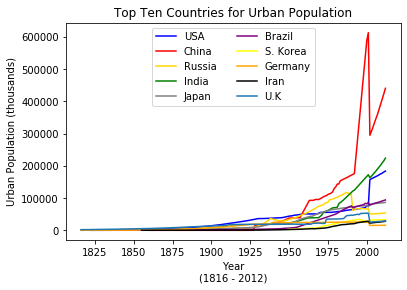

In [28]:
plt.plot(df_usa['year'], df_usa['upop'], color='blue')
plt.plot(df_china['year'], df_china['upop'], color='red')
plt.plot(df_russia['year'], df_russia['upop'], color='gold')
plt.plot(df_india['year'], df_india['upop'], color='green')
plt.plot(df_japan['year'], df_japan['upop'], color='grey')
plt.plot(df_brazil['year'], df_brazil['upop'], color='purple')
plt.plot(df_skorea['year'], df_skorea['upop'], color='yellow')
plt.plot(df_germany['year'], df_germany['upop'], color='orange')
plt.plot(df_iran['year'], df_iran['upop'], color='black')
plt.plot(df_uk['year'], df_uk['upop']); color='dark blue'
plt.title("Top Ten Countries for Urban Population")
plt.xlabel('Year\n(1816 - 2012)')
plt.ylabel('Urban Population (thousands)')
plt.legend(['USA', 'China', 'Russia', 'India', 'Japan', 'Brazil', 'S. Korea', 'Germany', 'Iran', 'U.K'], bbox_to_anchor=(.5, 1), loc='upper center', ncol=2);

**Total Population plot**

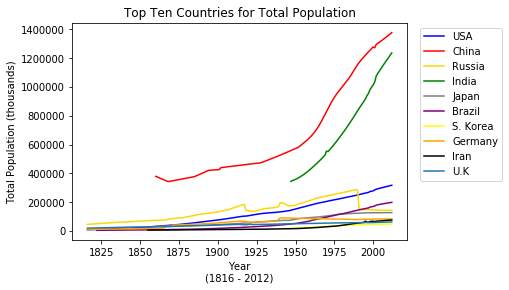

In [29]:
plt.plot(df_usa['year'], df_usa['tpop'], color='blue')
plt.plot(df_china['year'], df_china['tpop'], color='red')
plt.plot(df_russia['year'], df_russia['tpop'], color='gold')
plt.plot(df_india['year'], df_india['tpop'], color='green')
plt.plot(df_japan['year'], df_japan['tpop'], color='grey')
plt.plot(df_brazil['year'], df_brazil['tpop'], color='purple')
plt.plot(df_skorea['year'], df_skorea['tpop'], color='yellow')
plt.plot(df_germany['year'], df_germany['tpop'], color='orange')
plt.plot(df_iran['year'], df_iran['tpop'], color='black')
plt.plot(df_uk['year'], df_uk['tpop']); color='dark blue'
plt.title("Top Ten Countries for Total Population")
plt.xlabel('Year\n(1816 - 2012)')
plt.ylabel('Total Population (thousands)')
plt.legend(['USA', 'China', 'Russia', 'India', 'Japan', 'Brazil', 'S. Korea', 'Germany', 'Iran', 'U.K'], bbox_to_anchor=(1.3, 1), loc='upper right', ncol=1);

**U.S. Allies, Neutral, Non-Allies CINC plot**

https://en.wikipedia.org/wiki/List_of_military_alliances#Current_military-security_alliances



*   USA and Allies: USA, UK, S. Korea, Japan, Brazil, Germany
*   Neutral: India*
*   Non-Allies: China, Russia, Iran


*There are defense agreements in place between the U.S. and India. India also has close ties with Russia, which is why they are categorized as neutral for this analysis


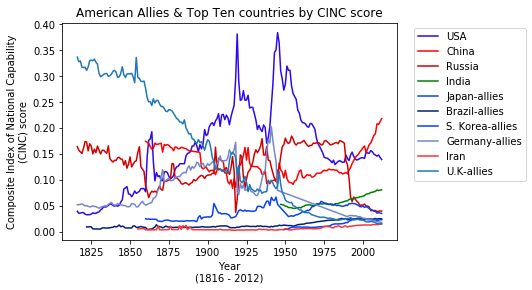

In [35]:
plt.plot(df_usa['year'], df_usa['cinc'], color='#2e08f0')
plt.plot(df_china['year'], df_china['cinc'], color='#ff0000')
plt.plot(df_russia['year'], df_russia['cinc'], color='#d10000')
plt.plot(df_india['year'], df_india['cinc'], color='green')
plt.plot(df_japan['year'], df_japan['cinc'], color='#083ff0')
plt.plot(df_brazil['year'], df_brazil['cinc'], color='#041e70')
plt.plot(df_skorea['year'], df_skorea['cinc'], color='#053fff')
plt.plot(df_germany['year'], df_germany['cinc'], color='#7287cc')
plt.plot(df_iran['year'], df_iran['cinc'], color='#ff3333')
plt.plot(df_uk['year'], df_uk['cinc']); color='#00208a'
plt.title("American Allies & Top Ten countries by CINC score")
plt.xlabel('Year\n(1816 - 2012)')
plt.ylabel('Composite Index of National Capability\n(CINC) score')
plt.legend(['USA', 'China', 'Russia', 'India', 'Japan-allies', 'Brazil-allies', 'S. Korea-allies', 'Germany-allies', 'Iran', 'U.K-allies'], bbox_to_anchor=(1.4, 1), loc='upper right', ncol=1);





**U.S. Allies, Neutral, Non-Allies Military Expenditure plot**

https://en.wikipedia.org/wiki/List_of_military_alliances#Current_military-security_alliances



*   USA and Allies: USA, UK, S. Korea, Japan, Brazil, Germany
*   Neutral: India*
*   Non-Allies: China, Russia, Iran


*There are defense agreements in place between the U.S. and India. India also has close ties with Russia, which is why they are categorized as neutral for this analysis

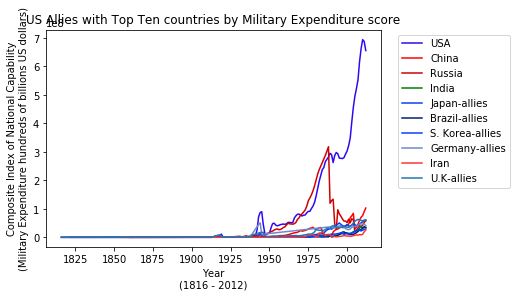

In [36]:
plt.plot(df_usa['year'], df_usa['milex'], color='#2e08f0')
plt.plot(df_china['year'], df_china['milex'], color='#ff0000')
plt.plot(df_russia['year'], df_russia['milex'], color='#d10000')
plt.plot(df_india['year'], df_india['milex'], color='green')
plt.plot(df_japan['year'], df_japan['milex'], color='#083ff0')
plt.plot(df_brazil['year'], df_brazil['milex'], color='#041e70')
plt.plot(df_skorea['year'], df_skorea['milex'], color='#053fff')
plt.plot(df_germany['year'], df_germany['milex'], color='#7287cc')
plt.plot(df_iran['year'], df_iran['milex'], color='#ff3333')
plt.plot(df_uk['year'], df_uk['milex']); color='#00208a'
plt.title("US Allies with Top Ten countries by Military Expenditure score")
plt.xlabel('Year\n(1816 - 2012)')
plt.ylabel('Composite Index of National Capability\n(Military Expenditure hundreds of billions US dollars)')
plt.legend(['USA', 'China', 'Russia', 'India', 'Japan-allies', 'Brazil-allies', 'S. Korea-allies', 'Germany-allies', 'Iran', 'U.K-allies'], bbox_to_anchor=(1.4, 1), loc='upper right', ncol=1);

**Thoughts on additional future research**

There are some areas that would be interesting to take further that might provide additional insight. These include;

1.   Looking at these countries with GDP (Gross Domestic Product) considered
2.   Running an analysis on the largest/ fastest changes for certain variables. For example: Military Expenditure and timeframe to determine strategic shifts in foreign policy that might not be expected, and may provide insight.
3.   Bar chart Race plot

# **LINKS and CITATIONS**

https://correlatesofwar.org/

https://correlatesofwar.org/data-sets/national-material-capabilities

https://en.wikipedia.org/wiki/List_of_military_alliances#Current_military-security_alliances

